In [4]:
%run IDM_helper_functions.ipynb

In [9]:
from pyddm import Model
from pyddm.models import DriftConstant, DriftLinear, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model

from pyddm import Fittable, Fitted, Sample
from pyddm.models import LossRobustBIC, LossBIC, LossLikelihood, LossRobustLikelihood,LossSquaredError
from pyddm.functions import fit_adjust_model

## Simulate from LCA and fit with OUM

In [25]:
n_trials = 1000
sim_num = 20
# [2, 2, 4, 0.5]


prior_LCA = utils.BoxUniform(low=[0,0.5,0.2,0,0], high=[2,2,0.5,4,4])
param_LCA = prior_LCA.sample((sim_num,))

par_fitted = np.zeros((sim_num,4))

In [26]:
for i in range(sim_num):
    print(i)
    LCA_o = simul_LCA_full5(np.tile(param_LCA[i,:], (n_trials,1))) # simulate LCA data
    print(param_LCA[i,:])
    print(LCA_o[0:10,:])
    
    # rescale data
    LCA_o[:,1] = -LCA_o[:,1] + 1
    LCA_o = np.array(LCA_o[:,:])
    samp = Sample.from_numpy_array(LCA_o, column_names = [])
    
    
    
    model_fit = Model(name='Simple model (fitted)',
                      drift=DriftLinear(drift=Fittable(minval=0, maxval=2),
                                        t = 0,
                                        x=Fittable(minval=-8, maxval=8)),
                      noise=NoiseConstant(noise=1),
                      bound=BoundConstant(B=Fittable(minval=0.5, maxval=4)),
                      overlay=OverlayNonDecision(nondectime=Fittable(minval=0.2, maxval=0.5)),
                      dx=.001, dt=.001, T_dur=3.5)
                      #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)
    
    par_fitted[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    par_fitted[i,3] = np.array(model_fit.parameters()['drift']['x'])
    
    print(param_LCA[i,:])
    print(par_fitted[i,:])
    


0
sim0
tensor([1.4619, 1.4961, 0.4933, 3.5992, 0.8997])
tensor([[1.1443, 0.0000],
        [2.7083, 1.0000],
        [1.0183, 0.0000],
        [1.2833, 0.0000],
        [2.4843, 0.0000],
        [1.3203, 0.0000],
        [2.9673, 0.0000],
        [1.3803, 0.0000],
        [2.0953, 1.0000],
        [0.9613, 0.0000]])


Info: Params [0.90826751 0.81657026 1.48360406 0.47871422] gave 2278.4300356917734


tensor([1.4619, 1.4961, 0.4933, 3.5992, 0.8997])
[0.90826751 1.48360406 0.47871422 0.81657026]
1
sim0
tensor([0.3453, 1.9641, 0.2267, 0.8273, 1.0904])
tensor([[3.2267, 1.0000],
        [3.2267, 1.0000],
        [1.4327, 1.0000],
        [1.8727, 0.0000],
        [3.2127, 1.0000],
        [3.2267, 1.0000],
        [3.2267, 1.0000],
        [3.2267, 0.0000],
        [2.7197, 0.0000],
        [2.2857, 1.0000]])


Info: Params [0.13681227 0.77815738 3.00329335 0.21649072] gave 4366.618398320707


tensor([0.3453, 1.9641, 0.2267, 0.8273, 1.0904])
[0.13681227 3.00329335 0.21649072 0.77815738]
2
sim0
tensor([0.2482, 1.1145, 0.3222, 2.5833, 1.0612])
tensor([[1.3552, 0.0000],
        [0.6832, 1.0000],
        [0.5742, 0.0000],
        [0.6172, 1.0000],
        [0.7232, 1.0000],
        [0.7022, 1.0000],
        [0.8182, 1.0000],
        [0.4942, 0.0000],
        [2.0842, 0.0000],
        [1.5012, 0.0000]])


Info: Params [0.16043455 0.75821778 1.08244574 0.32197197] gave 2840.9567391929654


tensor([0.2482, 1.1145, 0.3222, 2.5833, 1.0612])
[0.16043455 1.08244574 0.32197197 0.75821778]
3
sim0
tensor([0.6270, 1.2017, 0.2649, 1.1418, 2.2782])
tensor([[2.1729, 1.0000],
        [3.2649, 0.0000],
        [2.8009, 0.0000],
        [0.6179, 1.0000],
        [1.6289, 0.0000],
        [1.0339, 0.0000],
        [0.7429, 0.0000],
        [2.2759, 0.0000],
        [1.9039, 0.0000],
        [1.5849, 1.0000]])


Info: Params [0.32586228 0.80367952 1.51645455 0.20565369] gave 3436.16088300441


tensor([0.6270, 1.2017, 0.2649, 1.1418, 2.2782])
[0.32586228 1.51645455 0.20565369 0.80367952]
4
sim0
tensor([0.5759, 1.9680, 0.2359, 1.2931, 3.1896])
tensor([[3.2359, 0.0000],
        [3.2359, 0.0000],
        [3.2359, 1.0000],
        [3.2359, 1.0000],
        [3.2359, 0.0000],
        [3.2359, 1.0000],
        [3.2359, 1.0000],
        [3.2359, 0.0000],
        [3.2359, 1.0000],
        [3.2359, 0.0000]])


Info: Params [0.00589831 0.73553965 3.97626184 0.49912201] gave 3790.366371851312


tensor([0.5759, 1.9680, 0.2359, 1.2931, 3.1896])
[0.00589831 3.97626184 0.49912201 0.73553965]
5
sim0
tensor([0.6213, 1.6368, 0.4225, 0.5453, 3.0780])
tensor([[3.4225, 1.0000],
        [3.4225, 1.0000],
        [3.4225, 1.0000],
        [2.7365, 0.0000],
        [3.4225, 1.0000],
        [3.4225, 0.0000],
        [3.4225, 0.0000],
        [3.4225, 0.0000],
        [1.2775, 0.0000],
        [3.4225, 1.0000]])


Info: Params [0.09155082 0.67560638 3.97049468 0.2998325 ] gave 4329.9030717141795


tensor([0.6213, 1.6368, 0.4225, 0.5453, 3.0780])
[0.09155082 3.97049468 0.2998325  0.67560638]
6
sim0
tensor([0.1912, 1.7414, 0.4959, 0.1259, 0.8568])
tensor([[1.4549, 0.0000],
        [1.1389, 0.0000],
        [1.6679, 0.0000],
        [1.2309, 1.0000],
        [2.1079, 0.0000],
        [3.4959, 0.0000],
        [1.6919, 0.0000],
        [1.1669, 0.0000],
        [3.4959, 1.0000],
        [1.2739, 0.0000]])


Info: Params [0.12881108 1.31425487 2.76866572 0.28826273] gave 3427.8362478665263


tensor([0.1912, 1.7414, 0.4959, 0.1259, 0.8568])
[0.12881108 2.76866572 0.28826273 1.31425487]
7
sim0
tensor([0.9738, 1.2778, 0.4011, 0.9721, 2.4501])
tensor([[1.2391, 0.0000],
        [0.7831, 0.0000],
        [3.2551, 0.0000],
        [1.0481, 0.0000],
        [1.0971, 0.0000],
        [2.8501, 1.0000],
        [0.8041, 0.0000],
        [1.3491, 0.0000],
        [1.1021, 0.0000],
        [1.9731, 0.0000]])


Info: Params [0.41875628 0.74174708 1.59467376 0.33476701] gave 3461.1926778977654


tensor([0.9738, 1.2778, 0.4011, 0.9721, 2.4501])
[0.41875628 1.59467376 0.33476701 0.74174708]
8
sim0
tensor([0.2699, 1.1500, 0.2126, 0.5732, 0.3310])
tensor([[0.6366, 0.0000],
        [0.5506, 0.0000],
        [0.5826, 1.0000],
        [0.4186, 0.0000],
        [0.6046, 1.0000],
        [0.6526, 0.0000],
        [0.3606, 1.0000],
        [0.3426, 1.0000],
        [1.5326, 1.0000],
        [0.4136, 1.0000]])


Info: Params [0.25698835 3.21891247 1.20507184 0.21538306] gave 1441.4526279142137


tensor([0.2699, 1.1500, 0.2126, 0.5732, 0.3310])
[0.25698835 1.20507184 0.21538306 3.21891247]
9
sim0
tensor([0.2324, 1.9787, 0.4023, 0.3291, 1.5579])
tensor([[3.3153, 0.0000],
        [3.4023, 0.0000],
        [3.4023, 1.0000],
        [3.4023, 0.0000],
        [3.4023, 0.0000],
        [3.4023, 0.0000],
        [2.8433, 0.0000],
        [3.4023, 1.0000],
        [3.4023, 0.0000],
        [1.5943, 0.0000]])


Info: Params [0.05075128 0.72662171 3.99489949 0.22027147] gave 4349.487785498603


tensor([0.2324, 1.9787, 0.4023, 0.3291, 1.5579])
[0.05075128 3.99489949 0.22027147 0.72662171]
10
sim0
tensor([1.8701, 1.4995, 0.4607, 3.4606, 3.2537])
tensor([[3.3147, 0.0000],
        [1.7567, 0.0000],
        [3.4607, 0.0000],
        [1.2097, 0.0000],
        [3.4607, 1.0000],
        [1.7857, 0.0000],
        [3.4607, 1.0000],
        [1.8927, 0.0000],
        [1.1607, 0.0000],
        [3.4607, 0.0000]])


Info: Params [0.47376823 0.6962284  3.15175523 0.20340119] gave 4114.775676554603


tensor([1.8701, 1.4995, 0.4607, 3.4606, 3.2537])
[0.47376823 3.15175523 0.20340119 0.6962284 ]
11
sim0
tensor([0.1009, 1.4325, 0.4964, 0.5307, 0.7470])
tensor([[1.4764, 0.0000],
        [0.9394, 1.0000],
        [1.2784, 1.0000],
        [0.8904, 0.0000],
        [3.2304, 0.0000],
        [2.3664, 0.0000],
        [1.6984, 0.0000],
        [1.9184, 0.0000],
        [1.1764, 1.0000],
        [1.3914, 1.0000]])


Info: Params [0.05211074 1.61931111 2.01395845 0.3757028 ] gave 2983.3780847928147


tensor([0.1009, 1.4325, 0.4964, 0.5307, 0.7470])
[0.05211074 2.01395845 0.3757028  1.61931111]
12
sim0
tensor([0.0888, 1.1161, 0.2930, 3.7002, 3.2261])
tensor([[3.2100, 1.0000],
        [0.8610, 1.0000],
        [1.3400, 0.0000],
        [2.8270, 1.0000],
        [1.5650, 1.0000],
        [3.2930, 1.0000],
        [2.9190, 0.0000],
        [3.2930, 1.0000],
        [1.3170, 1.0000],
        [3.2930, 0.0000]])


Info: Params [0.02077462 0.39347313 1.77068504 0.20654521] gave 4640.70606875838


tensor([0.0888, 1.1161, 0.2930, 3.7002, 3.2261])
[0.02077462 1.77068504 0.20654521 0.39347313]
13
sim0
tensor([0.2450, 1.9625, 0.4622, 3.7438, 3.6498])
tensor([[3.4622, 1.0000],
        [3.4622, 0.0000],
        [3.4622, 0.0000],
        [3.4622, 1.0000],
        [3.4622, 0.0000],
        [3.4622, 1.0000],
        [3.4622, 1.0000],
        [3.4622, 0.0000],
        [3.4622, 0.0000],
        [3.4622, 0.0000]])


Info: Params [0.         0.66327779 3.99883697 0.49814774] gave 3980.557974182704


tensor([0.2450, 1.9625, 0.4622, 3.7438, 3.6498])
[0.         3.99883697 0.49814774 0.66327779]
14
sim0
tensor([1.2585, 1.6605, 0.2896, 0.4388, 2.5923])
tensor([[3.2896, 0.0000],
        [2.9666, 0.0000],
        [0.9306, 1.0000],
        [0.6636, 0.0000],
        [2.8296, 0.0000],
        [3.2896, 1.0000],
        [2.8966, 0.0000],
        [3.2896, 0.0000],
        [3.2896, 0.0000],
        [3.2896, 0.0000]])


Error:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/wangjiashun/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_46615/2592703483.py", line 26, in <module>
    lossfunction=LossRobustBIC, verbose=False)
  File "/Users/wangjiashun/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/pyddm/functions.py", line 366, in fit_adjust_model
    x_fit = differential_evolution(_fit_model, constraints, **fitparams)
  File "/Users/wangjiashun/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/scipy/optimize/_differentialevolution.py", line 329, in differential_evolution
    ret = solver.solve()
  File "/Users/wangjiashun/opt/anaconda3/envs/sbi_env/lib/python3.7/site-packages/scipy/optimize/_differentialevolution.py", line 852, in solve
    next(self)
  File "/Users/wangjiashun/opt/anaconda3/envs/sbi_env/lib/pytho

TypeError: object of type 'NoneType' has no len()

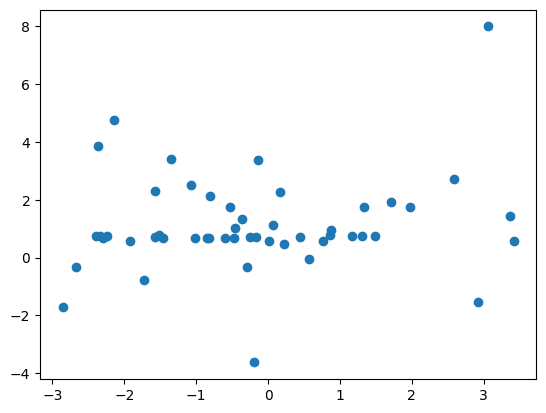

In [24]:
plt.scatter((param_LCA[:50,3]-param_LCA[:50,4]), par_fitted[:50,3])

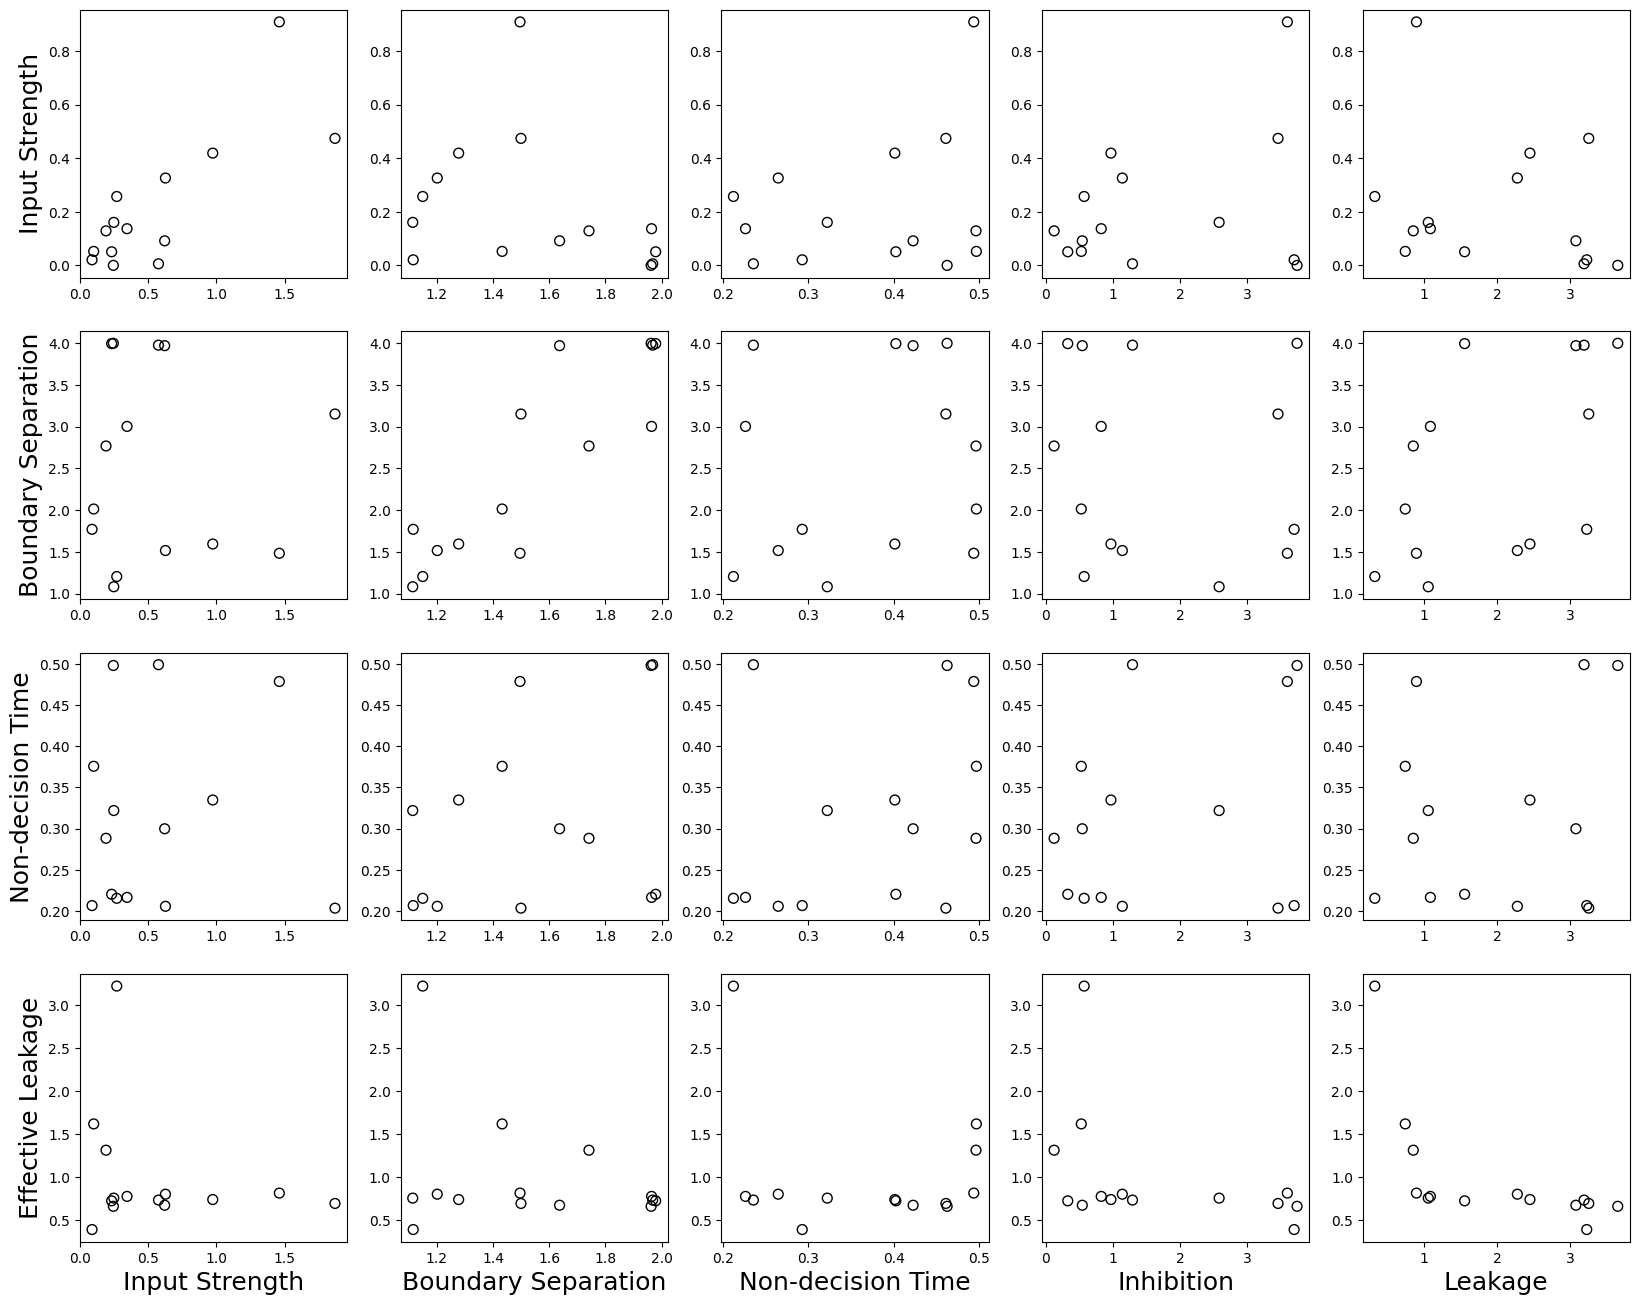

In [27]:
par_labels = ["Input Strength","Boundary Separation","Non-decision Time", "Inhibition", "Leakage"]
par_fitted_labels = ["Input Strength","Boundary Separation","Non-decision Time", "Effective Leakage"]
sim_fit_plot_all(param_LCA[:14,:], par_fitted[:14,:], par_labels, par_fitted_labels, 
                 s = 50, figsize=(20,16))